In [2]:
import os
import sys
sys.path.insert(0, os.path.abspath('../'))

import numpy as np 
import torch
import torchvision
import matplotlib.pyplot as plt
from collections import defaultdict
import glob

import datasets.mnist as mnist
import datasets.cifar10 as cifar10
import constants
from configuration import Configuration

from util import *

import nb_util
from importlib import reload

In [3]:
mnist_dir = '/scratch/gp491/wandb/checkpoints/mnist-moe'
baseline_dirs = list([f'/scratch/gp491/wandb/checkpoints/mnist_baseline_{s}' for s in [0, 10, 2137]])

In [4]:
mnist_res = defaultdict(list)

for d in baseline_dirs + [mnist_dir]:
    paths =  glob.glob(f'{d}/*')
    for path in paths:
        try:
            res = nb_util.MNISTRunData(path)
            mnist_res[res.name].append(res)
        except:
            pass

In [5]:
mnist_res_comb = {}
for key, value in mnist_res.items():
    mnist_res_comb[key] = nb_util.MNISTMultiRunData(value)

In [6]:
baselines = [mnist_res_comb['lenet-single'], mnist_res_comb['lenet-ens-5']]

In [7]:
ens_loss = list([rd for key, rd in mnist_res_comb.items() if 'ens-loss' in rd.name and 'mcd' not in rd.name and 'sparse' not in rd.name])
sum_loss = list([rd for key, rd in mnist_res_comb.items() if 'sum-loss' in rd.name and 'mcd' not in rd.name and 'sparse' not in rd.name])

In [8]:
for rd in sum_loss:
    print(rd.name)

sum-loss-gate-conv
sum-loss-gate-same
sum-loss-gate-simple


In [9]:
nb_util = reload(nb_util)

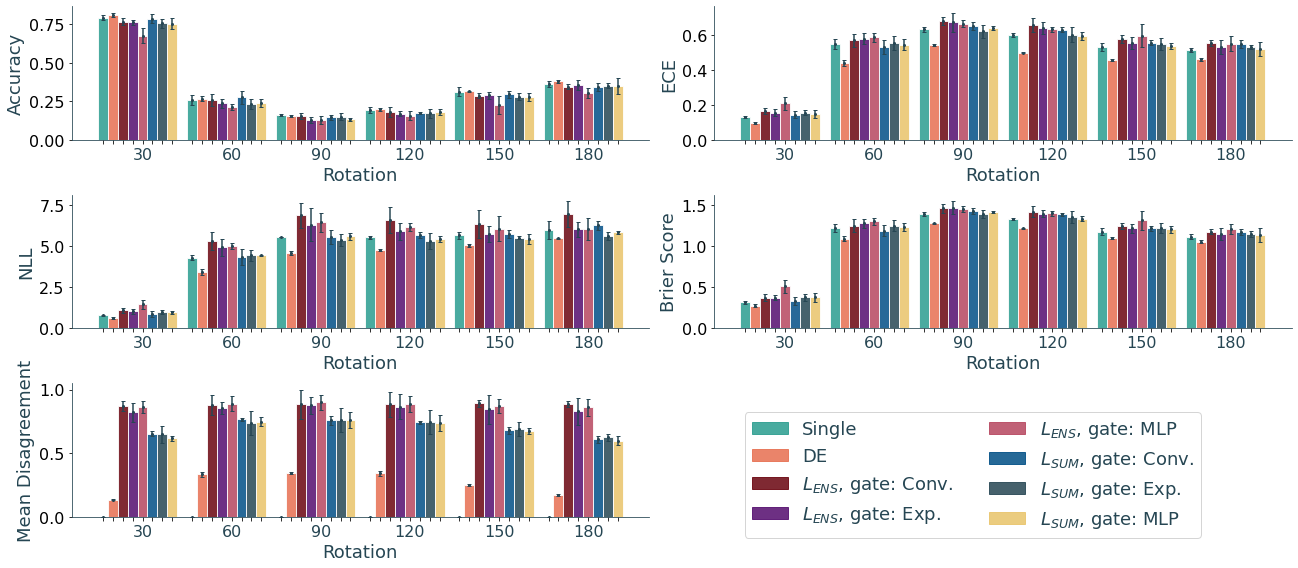

In [148]:
fig, axs = plt.subplots(3, 2, figsize = (18, 8))
for ax, i in zip(axs.flatten(), [0, 3, 4, 5, 2]):
    legend = i == 2
    labels = nb_util.plot_single_metric_error_bar_mnist(
        ax, 
        baselines + ens_loss + sum_loss, 
        *nb_util.METRIC_NAMES[i], 
        shift='rot', 
        x_label='Rotation', 
        y_label=nb_util.METRIC_LABELS[i], 
        legend=legend, 
        picks=[3, 5, 7, 9, 11, 13], 
        legend_col=2, 
        legend_bbox=(1.15, 0.85), 
        fontsize=18,
        alpha=0.85,
        )
# fig.suptitle(f'Dataset Rotation {labels[shift]}'+'$^{\circ}$', fontsize=15, color=dark_greeen)
fig.delaxes(axs[2,1])
fig.tight_layout()
# plt.savefig('best-reg-ood-t.pdf')
fig.savefig('imgs/moe_mnist_baseline.pdf', bbox_inches='tight')

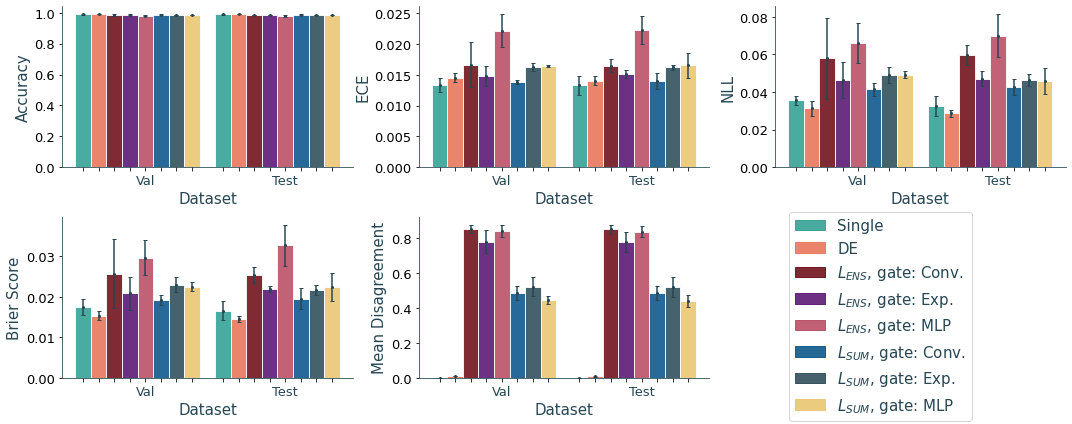

In [147]:
fig, axs = plt.subplots(2, 3, figsize = (15, 6))
shift = 5
for ax, i in zip(axs.flatten(), [0, 3, 4, 5, 2]):
    legend = i == 2
    labels = nb_util.plot_single_metric_error_bar_mnist(
        ax, 
        baselines + ens_loss + sum_loss, 
        *nb_util.METRIC_NAMES[i], 
        shift='tran',
        x_label='Dataset', 
        y_label=nb_util.METRIC_LABELS[i], 
        legend=legend, 
        legend_bbox=(1.25, 1.075),
        legend_col=1,
        picks=[0, 1], 
        fontsize=15,
        alpha=0.85)
# fig.suptitle(f'Dataset Rotation {labels[shift]}'+'$^{\circ}$', fontsize=15, color=dark_greeen)
fig.delaxes(axs[1,2])
fig.tight_layout()
plt.savefig('imgs/mnist_moe_baselines_id.pdf')


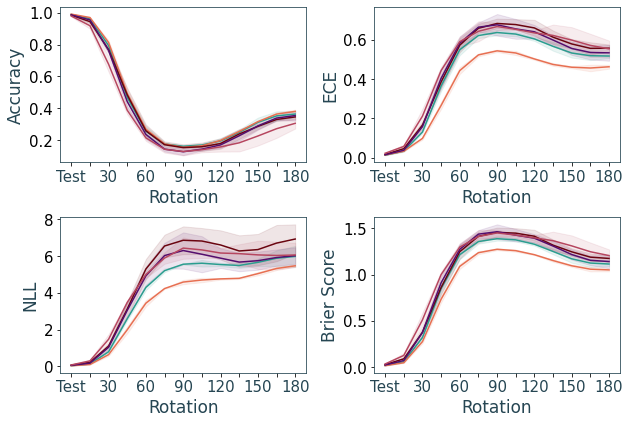

In [137]:
fig, axs = plt.subplots(2, 2, figsize = (9, 6))
# metrics = [0, 3, 4, 5]
for ax, metric in zip(axs.flatten(), [0, 3, 4, 5, 2]):

    nb_util.plot_single_metric_error_mnist(
        ax, 
        baselines + ens_loss, 
        *nb_util.METRIC_NAMES[metric], 
        shift='rot', 
        x_label='Rotation', 
        y_label=nb_util.METRIC_LABELS[metric], 
        legend=False, 
        include_val=False,
        sparse_ticks=2,
        error_alpha=0.1,
        fontsize=17,
        )

    # legend = True
    # plot_single_metric_error(
    #     axs[i, 1], 
    #     rds[key], 
    #     *METRIC_NAMES[3], 
    #     shift='rot', 
    #     x_label='Rotation', 
    #     y_label=METRIC_LABELS[3], 
    #     legend=True, 
    #     include_val=False, 
    #     legend_param_only=True, 
    #     legend_fontsize=15,
    #     fontsize=17,
    #     sparse_ticks=2,
    #     error_alpha=0.1,
    #     legend_bbox=(1,1.05)
    #     # legend_title=None if 'anneal' not in key else f"$\lambda =$ {get_nums(rds[key][0].name)[0]}"
    #     )

# fig.suptitle(f'Translation Dataset Shift ', fontsize=15, color=dark_greeen)
fig.tight_layout()

In [58]:
ens_loss_mcd = list([rd for key, rd in mnist_res_comb.items() if 'ens-loss' in rd.name and 'mcd' in rd.name and 'sparse' not in rd.name])
sum_loss_mcd = list([rd for key, rd in mnist_res_comb.items() if 'sum-loss' in rd.name and 'mcd' in rd.name and 'sparse' not in rd.name])

In [59]:
sum_loss_conv_mcd = list([rd for rd in sum_loss_mcd if 'conv' in rd.name])
sum_loss_same_mcd = list([rd for rd in sum_loss_mcd if 'lenet' in rd.name])
sum_loss_mlp_mcd = list([rd for rd in sum_loss_mcd if 'simple' in rd.name])

sum_loss_mcd01 = list([rd for rd in sum_loss_mcd if '0.1' == rd.name[-3:]])
sum_loss_mcd05 = list([rd for rd in sum_loss_mcd if '0.5' == rd.name[-3:]])
sum_loss_mcd09 = list([rd for rd in sum_loss_mcd if '0.9' == rd.name[-3:]])

ens_loss_conv_mcd = list([rd for rd in ens_loss_mcd if 'conv' in rd.name])
ens_loss_same_mcd = list([rd for rd in ens_loss_mcd if 'lenet' in rd.name])
ens_loss_mlp_mcd = list([rd for rd in ens_loss_mcd if 'simple' in rd.name])

ens_loss_mcd01 = list([rd for rd in ens_loss_mcd if '0.1' == rd.name[-3:]])
ens_loss_mcd05 = list([rd for rd in ens_loss_mcd if '0.5' == rd.name[-3:]])
ens_loss_mcd09 = list([rd for rd in ens_loss_mcd if '0.9' == rd.name[-3:]])

In [60]:
for rd in ens_loss_conv_mcd:
    print(rd.name)

ens-loss-gate-mcd_conv-0.1
ens-loss-gate-mcd_conv-0.5
ens-loss-gate-mcd_conv-0.9


In [61]:
names_mcd = ['Single', 'DE', 'Base MoE', '$p=0.1$', '$p=0.5$', '$p=0.9$']

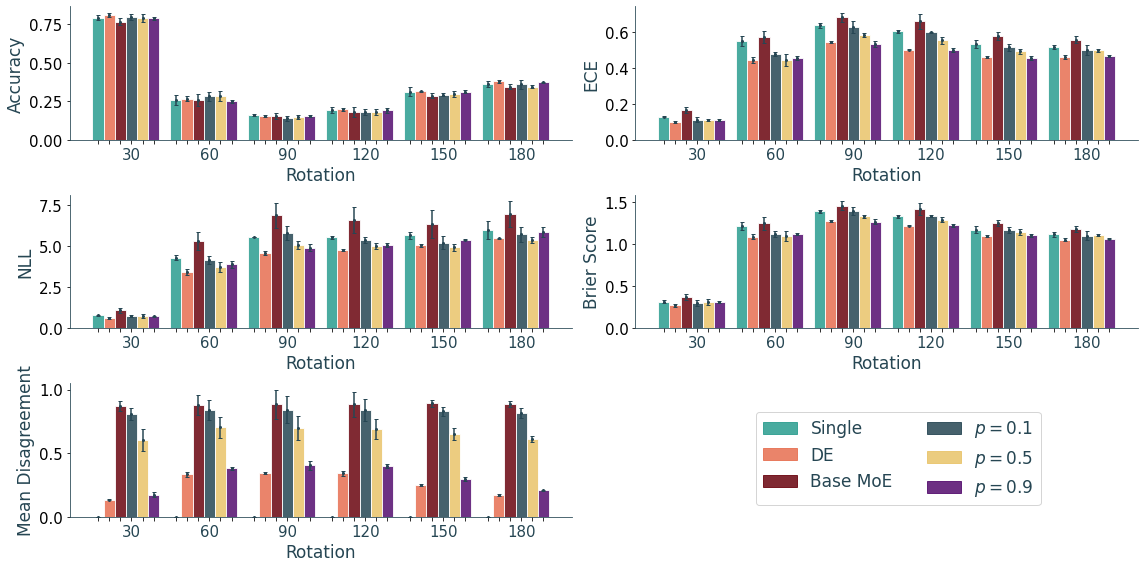

In [90]:
fig, axs = plt.subplots(3, 2, figsize = (16, 8))
for ax, i in zip(axs.flatten(), [0, 3, 4, 5, 2]):
    legend = i == 2
    labels = nb_util.plot_single_metric_error_bar_mnist(
        ax, 
        baselines + [mnist_res_comb['ens-loss-gate-conv']] + ens_loss_conv_mcd, 
        *nb_util.METRIC_NAMES[i], 
        shift='rot', 
        x_label='Rotation', 
        y_label=nb_util.METRIC_LABELS[i], 
        legend=legend, 
        picks=[3, 5, 7, 9, 11, 13], 
        legend_col=2, 
        legend_bbox=(1.35, 0.85), 
        fontsize=17,
        alpha=0.85,
        leg_names=names_mcd)
# fig.suptitle(f'Dataset Rotation {labels[shift]}'+'$^{\circ}$', fontsize=15, color=dark_greeen)
fig.delaxes(axs[2,1])
fig.tight_layout()
fig.savefig('imgs/mnist_moe_mcd_shif.pdf', bbox_inches='tight')

In [75]:
nb_util = reload(nb_util)

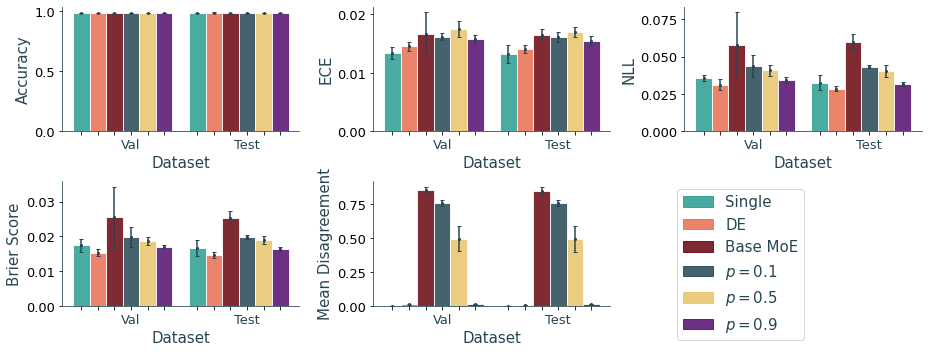

In [91]:
fig, axs = plt.subplots(2, 3, figsize = (13, 5))
shift = 5
for ax, i in zip(axs.flatten(), [0, 3, 4, 5, 2]):
    legend = i == 2
    labels = nb_util.plot_single_metric_error_bar_mnist(
        ax, 
        baselines + [mnist_res_comb['ens-loss-gate-conv']] + ens_loss_conv_mcd, 
        *nb_util.METRIC_NAMES[i], 
        shift='tran',
        x_label='Dataset', 
        y_label=nb_util.METRIC_LABELS[i], 
        legend=legend, 
        legend_bbox=(1.25, 1),
        legend_col=1,
        picks=[0, 1], 
        fontsize=15,
        alpha=0.85,
        leg_names=names_mcd)
# fig.suptitle(f'Dataset Rotation {labels[shift]}'+'$^{\circ}$', fontsize=15, color=dark_greeen)
fig.delaxes(axs[1,2])
fig.tight_layout()
fig.savefig('imgs/mnist_moe_mcd_id.pdf', bbox_inches='tight')

In [103]:
ens_loss_sparse = list([rd for key, rd in mnist_res_comb.items() if 'ens-loss' in rd.name and 'mcd' not in rd.name and 'sparse' in rd.name])

In [106]:
len(ens_loss_sparse)

3

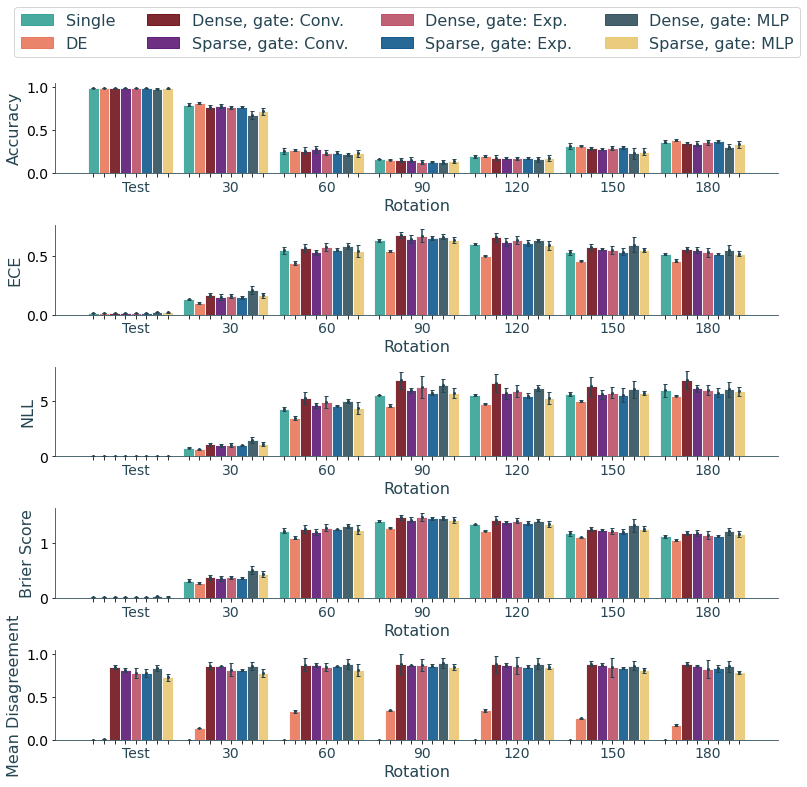

In [143]:
alternating = []
for r1, r2 in zip(ens_loss, ens_loss_sparse):
    alternating.append(r1)
    alternating.append(r2)
fig, axs = plt.subplots(5, 1, figsize = (11, 10))
for ax, i in zip(axs.flatten(), [0, 3, 4, 5, 2]):
    legend = i == 2
    labels, l = nb_util.plot_single_metric_error_bar_mnist(
        ax, 
        baselines + alternating, 
        *nb_util.METRIC_NAMES[i], 
        shift='rot', 
        x_label='Rotation', 
        y_label=nb_util.METRIC_LABELS[i], 
        legend=legend, 
        picks=[1, 3, 5, 7, 9, 11, 13], 
        legend_col=4, 
        legend_bbox=(1.025, 1.1), 
        fontsize=16,
        alpha=0.85,
        fig_for_legend=fig,
        legend_in_layout=True,
        )
# fig.suptitle(f'Dataset Rotation {labels[shift]}'+'$^{\circ}$', fontsize=15, color=dark_greeen)
# fig.delaxes(axs[2,1])
fig.tight_layout()
fig.savefig('imgs/sparse_vs_dense_moe_mnist.pdf', bbox_extra_artists=(l,), bbox_inches='tight')

In [87]:
nb_util = reload(nb_util)

In [176]:
test_loader = mnist.get_test_loader('/scratch/gp491/data', 128, corrupted=True, intensity=60, corruption='rotation')
metric_dict = {'NLL': lambda p, g: metrics.basic_cross_entropy(p, g).item(), 
                    'ECE': metrics.wrap_ece(bins=20), 
                    'Brier': metrics.wrap_brier()}

In [177]:
conf = 0
count = 0

gate_conf = 0
count_gate = 0
for rd in ens_loss + sum_loss:
    for r in rd.runs:
        print(r.name)
        trainer, model_args = load_trainer('/'.join(r.path.split('/')[-2:]), 40, device='cuda')
        acc, metric_res, stat_tracker = trainer.test(test_loader=test_loader, metric_dict=metric_dict);
        conf += stat_tracker.cum_conf / stat_tracker.total
        count += 1

        with torch.no_grad():
            for x, y in test_loader:
                x, y = x.cuda(), y.cuda()
                gate_out = trainer.model.gating_network(x)
                ma, amax = gate_out.max(1)
                gate_conf += ma.sum().cpu().numpy()
                count_gate += x.shape[0]

  0%|          | 0/79 [00:00<?, ?batch/s]

ens-loss-gate-conv
Initialising a Mixture of Experts
criterion: <function ensemble_criterion at 0x7f1a9e751b80>
Using a simple convolutional gate

Testing


/homes/gp491/deepens/proj-env/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/homes/gp491/deepens/proj-env/lib/python3.8/site-packages/numpy/core/_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/homes/gp491/deepens/proj-env/lib/python3.8/site-packages/numpy/core/_methods.py:188: RuntimeWarning: invalid value encountered in true_divide
  ret = ret.dtype.type(ret / rcount)
100%|██████████| 79/79 [00:00<00:00, 91.30batch/s] 

Results: 
Accuracy: 0.2661
NLL: 5.224353984832764
ECE: 0.5589358253136277
Brier: 1.2268213455200194



  0%|          | 0/79 [00:00<?, ?batch/s]

ens-loss-gate-conv
Initialising a Mixture of Experts
criterion: <function ensemble_criterion at 0x7f1a9e751b80>
Using a simple convolutional gate

Testing


100%|██████████| 79/79 [00:00<00:00, 89.41batch/s] 

Results: 
Accuracy: 0.2394
NLL: 5.588553253936768
ECE: 0.5913227619901299
Brier: 1.2925045092582703



  0%|          | 0/79 [00:00<?, ?batch/s]

ens-loss-gate-conv
Initialising a Mixture of Experts
criterion: <function ensemble_criterion at 0x7f1a9e751b80>
Using a simple convolutional gate

Testing


100%|██████████| 79/79 [00:00<00:00, 92.85batch/s] 

Results: 
Accuracy: 0.2808
NLL: 5.0454088356018065
ECE: 0.5587768042474985
Brier: 1.2157459842681886



  0%|          | 0/79 [00:00<?, ?batch/s]

ens-loss-gate-same
Initialising a Mixture of Experts
criterion: <function ensemble_criterion at 0x7f1a9e751b80>

Testing


100%|██████████| 79/79 [00:00<00:00, 92.69batch/s] 

Results: 
Accuracy: 0.2174
NLL: 5.242100875854492
ECE: 0.6046859372317791
Brier: 1.3116732151031494



  0%|          | 0/79 [00:00<?, ?batch/s]

ens-loss-gate-same
Initialising a Mixture of Experts
criterion: <function ensemble_criterion at 0x7f1a9e751b80>

Testing


100%|██████████| 79/79 [00:00<00:00, 87.34batch/s] 

Results: 
Accuracy: 0.2349
NLL: 4.908278527832032
ECE: 0.5688565218821168
Brier: 1.261239707183838



  0%|          | 0/79 [00:00<?, ?batch/s]

ens-loss-gate-same
Initialising a Mixture of Experts
criterion: <function ensemble_criterion at 0x7f1a9e751b80>

Testing


100%|██████████| 79/79 [00:00<00:00, 95.01batch/s] 

Results: 
Accuracy: 0.2496
NLL: 4.70433927154541
ECE: 0.5782908120885492
Brier: 1.263530953979492



  0%|          | 0/79 [00:00<?, ?batch/s]

ens-loss-gate-simple
Initialising a Mixture of Experts
criterion: <function ensemble_criterion at 0x7f1a9e751b80>
Using a simple gate

Testing


100%|██████████| 79/79 [00:00<00:00, 90.50batch/s] 

Results: 
Accuracy: 0.2065
NLL: 5.044728093719482
ECE: 0.5808122284382582
Brier: 1.2940108432769775



  0%|          | 0/79 [00:00<?, ?batch/s]

ens-loss-gate-simple
Initialising a Mixture of Experts
criterion: <function ensemble_criterion at 0x7f1a9e751b80>
Using a simple gate

Testing


100%|██████████| 79/79 [00:00<00:00, 91.84batch/s] 

Results: 
Accuracy: 0.2184
NLL: 5.0261789840698246
ECE: 0.6025156255155801
Brier: 1.3152489265441893



  0%|          | 0/79 [00:00<?, ?batch/s]

ens-loss-gate-simple
Initialising a Mixture of Experts
criterion: <function ensemble_criterion at 0x7f1a9e751b80>
Using a simple gate

Testing


100%|██████████| 79/79 [00:00<00:00, 94.85batch/s] 

Results: 
Accuracy: 0.2271
NLL: 4.8749195747375484
ECE: 0.5718243512228132
Brier: 1.2658827543258666



  0%|          | 0/79 [00:00<?, ?batch/s]

sum-loss-gate-conv
Initialising a Mixture of Experts
criterion: <function loss_sum_criterion at 0x7f1a9e751c10>
Using a simple convolutional gate

Testing


100%|██████████| 79/79 [00:00<00:00, 93.21batch/s] 

Results: 
Accuracy: 0.2634
NLL: 4.667582621002198
ECE: 0.5553719105377793
Brier: 1.22223174533844



  0%|          | 0/79 [00:00<?, ?batch/s]

sum-loss-gate-conv
Initialising a Mixture of Experts
criterion: <function loss_sum_criterion at 0x7f1a9e751c10>
Using a simple convolutional gate

Testing


100%|██████████| 79/79 [00:00<00:00, 90.58batch/s] 


Results: 
Accuracy: 0.2715
NLL: 4.218521360778809
ECE: 0.5351786498129368
Brier: 1.187466417694092


  0%|          | 0/79 [00:00<?, ?batch/s]

sum-loss-gate-conv
Initialising a Mixture of Experts
criterion: <function loss_sum_criterion at 0x7f1a9e751c10>
Using a simple convolutional gate

Testing


100%|██████████| 79/79 [00:00<00:00, 90.82batch/s] 

Results: 
Accuracy: 0.3056
NLL: 4.0567648960113525
ECE: 0.508332612900436
Brier: 1.1418997352600098



  0%|          | 0/79 [00:00<?, ?batch/s]

sum-loss-gate-same
Initialising a Mixture of Experts
criterion: <function loss_sum_criterion at 0x7f1a9e751c10>

Testing


100%|██████████| 79/79 [00:00<00:00, 98.82batch/s] 

Results: 
Accuracy: 0.2118
NLL: 4.674961838531494
ECE: 0.584577289532125
Brier: 1.2901966665267945



  0%|          | 0/79 [00:00<?, ?batch/s]

sum-loss-gate-same
Initialising a Mixture of Experts
criterion: <function loss_sum_criterion at 0x7f1a9e751c10>

Testing


100%|██████████| 79/79 [00:00<00:00, 94.52batch/s] 

Results: 
Accuracy: 0.2283
NLL: 4.3952086067199705
ECE: 0.5601088164970279
Brier: 1.2448029079437255



  0%|          | 0/79 [00:00<?, ?batch/s]

sum-loss-gate-same
Initialising a Mixture of Experts
criterion: <function loss_sum_criterion at 0x7f1a9e751c10>

Testing


100%|██████████| 79/79 [00:00<00:00, 92.80batch/s] 

Results: 
Accuracy: 0.2471
NLL: 4.335720486450195
ECE: 0.5405316035881639
Brier: 1.2182653606414795



  0%|          | 0/79 [00:00<?, ?batch/s]

sum-loss-gate-simple
Initialising a Mixture of Experts
criterion: <function loss_sum_criterion at 0x7f1a9e751c10>
Using a simple gate

Testing


100%|██████████| 79/79 [00:00<00:00, 95.96batch/s] 

Results: 
Accuracy: 0.2284
NLL: 4.441515551757813
ECE: 0.560096048553288
Brier: 1.2500666397094726



  0%|          | 0/79 [00:00<?, ?batch/s]

sum-loss-gate-simple
Initialising a Mixture of Experts
criterion: <function loss_sum_criterion at 0x7f1a9e751c10>
Using a simple gate

Testing


100%|██████████| 79/79 [00:00<00:00, 96.63batch/s] 

Results: 
Accuracy: 0.2338
NLL: 4.402096753692627
ECE: 0.5590019196853042
Brier: 1.2463446422576905



  0%|          | 0/79 [00:00<?, ?batch/s]

sum-loss-gate-simple
Initialising a Mixture of Experts
criterion: <function loss_sum_criterion at 0x7f1a9e751c10>
Using a simple gate

Testing


100%|██████████| 79/79 [00:00<00:00, 97.55batch/s] 

Results: 
Accuracy: 0.2542
NLL: 4.471344100952148
ECE: 0.5295738453745842
Brier: 1.2012822290420533


In [175]:
conf/count

0.9881623584906263

In [178]:
gate_conf/count_gate

0.8961734120580885

In [34]:
la_name = 'ens-loss-gate-conv'

la_res = defaultdict(list)

paths =  glob.glob(f'/scratch/gp491/wandb/checkpoints/mnist-moe-laplace/*')
for path in paths:
    print(path)
    # try:
    if 'sparse' not in path and "1.0" not in path:
        res = nb_util.MNISTRunData(path)
        res.name = f'{res.name}-{path.split("-")[-1]}'
        la_res[res.name].append(res)
    # except:
    #     pass

la_res_comb = {}
for key, value in la_res.items():
    la_res_comb[key] = nb_util.MNISTMultiRunData(value)

/scratch/gp491/wandb/checkpoints/mnist-moe-laplace/run-20210806_000101-3s8rv8rr-Lprec-1.0
/scratch/gp491/wandb/checkpoints/mnist-moe-laplace/run-20210806_000101-3s8rv8rr-Lprec-0.01
/scratch/gp491/wandb/checkpoints/mnist-moe-laplace/run-20210806_000101-3s8rv8rr-Lprec-0.1
/scratch/gp491/wandb/checkpoints/mnist-moe-laplace/run-20210806_000101-3s8rv8rr-Lprec-0.5
/scratch/gp491/wandb/checkpoints/mnist-moe-laplace/run-20210806_000101-3s8rv8rr-Lprec-1
/scratch/gp491/wandb/checkpoints/mnist-moe-laplace/run-20210806_000101-3s8rv8rr-Lprec-10
/scratch/gp491/wandb/checkpoints/mnist-moe-laplace/run-20210806_001237-2rry7vu5-Lprec-1.0
/scratch/gp491/wandb/checkpoints/mnist-moe-laplace/run-20210806_001237-2rry7vu5-Lprec-0.01
/scratch/gp491/wandb/checkpoints/mnist-moe-laplace/run-20210806_001237-2rry7vu5-Lprec-0.1
/scratch/gp491/wandb/checkpoints/mnist-moe-laplace/run-20210806_001237-2rry7vu5-Lprec-0.5
/scratch/gp491/wandb/checkpoints/mnist-moe-laplace/run-20210806_001237-2rry7vu5-Lprec-1
/scratch/gp49

In [42]:
la_rds = [mnist_res_comb[la_name]] + list(reversed(list(la_res_comb.values())))

In [96]:
names = ['Base MoE',  f'$\gamma^2 = {0.1}$',  f'$\gamma^2 = {1}$', f'$\gamma^2 = {2}$',  f'$\gamma^2 = {10}$', f'$\gamma^2 = {100}$']
for rd, name in zip(la_rds, names):
    print(rd.name, name)

ens-loss-gate-conv Base MoE
ens-loss-gate-conv-10 $\gamma^2 = 0.1$
ens-loss-gate-conv-1 $\gamma^2 = 1$
ens-loss-gate-conv-0.5 $\gamma^2 = 2$
ens-loss-gate-conv-0.1 $\gamma^2 = 10$
ens-loss-gate-conv-0.01 $\gamma^2 = 100$


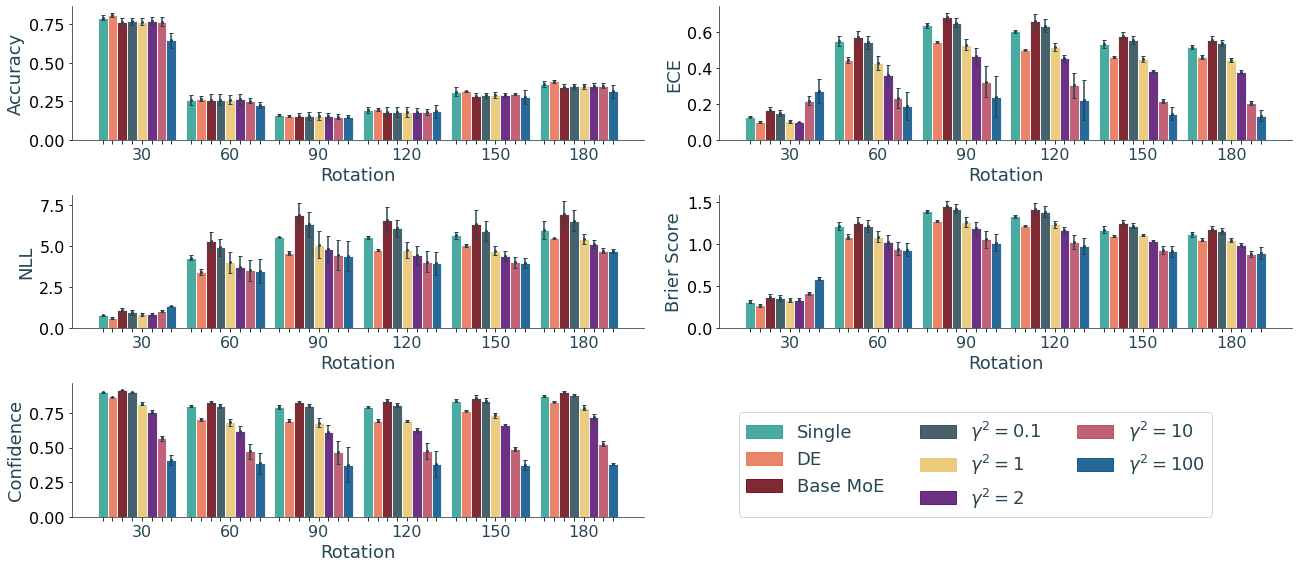

In [97]:
fig, axs = plt.subplots(3, 2, figsize = (18, 8))
for ax, i in zip(axs.flatten(), [0, 3, 4, 5, 1]):
    legend = i == 1
    labels = nb_util.plot_single_metric_error_bar_mnist(
        ax, 
        baselines + la_rds, 
        *nb_util.METRIC_NAMES[i], 
        shift='rot', 
        x_label='Rotation', 
        y_label=nb_util.METRIC_LABELS[i], 
        legend=legend, 
        picks=[3, 5, 7, 9, 11, 13], 
        legend_col=3, 
        legend_bbox=(1.15, 0.85), 
        fontsize=18,
        alpha=0.85,
        leg_names= ['Single', 'DE'] + names
        )
# fig.suptitle(f'Dataset Rotation {labels[shift]}'+'$^{\circ}$', fontsize=15, color=dark_greeen)
fig.delaxes(axs[2,1])
fig.tight_layout()
fig.savefig('imgs/mnist_moe_la_shifted.pdf', bbox_inches='tight')

In [85]:
nb_util = reload(nb_util)

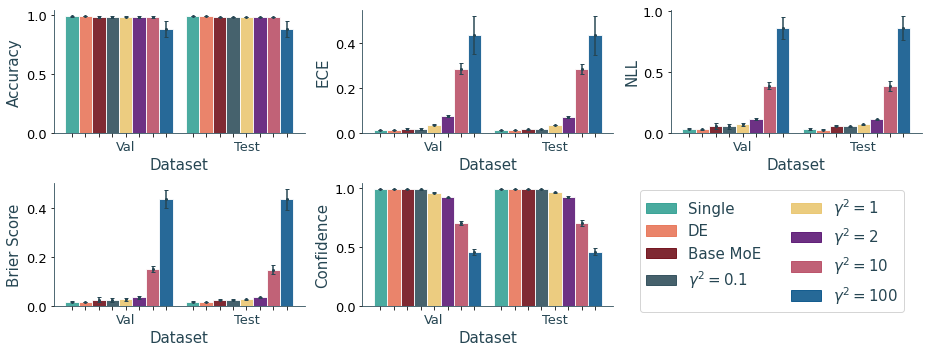

In [98]:
fig, axs = plt.subplots(2, 3, figsize = (13, 5))
shift = 5
for ax, i in zip(axs.flatten(), [0, 3, 4, 5, 1]):
    legend = i == 1
    labels = nb_util.plot_single_metric_error_bar_mnist(
        ax, 
        baselines + la_rds, 
        *nb_util.METRIC_NAMES[i], 
        shift='tran',
        x_label='Dataset', 
        y_label=nb_util.METRIC_LABELS[i], 
        legend=legend, 
        legend_bbox=(1.075, 1),
        legend_col=2,
        picks=[0, 1], 
        fontsize=15,
        alpha=0.85,
        leg_names= ['Single', 'DE'] + names)
# fig.suptitle(f'Dataset Rotation {labels[shift]}'+'$^{\circ}$', fontsize=15, color=dark_greeen)
fig.delaxes(axs[1,2])
fig.tight_layout()
fig.savefig('imgs/mnist_moe_la_id.pdf', bbox_inches='tight')